# Mandar a llamar el Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data= pd.read_csv("train.csv")

In [8]:
data

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
14442,557,-122.25,37.77,43,4329,1110.0,2086,1053,2.9750,243400.0,NEAR BAY
14443,16090,-122.48,37.71,43,3850,1018.0,1497,829,3.5296,400000.0,NEAR OCEAN
14444,9083,-118.17,34.69,12,4881,803.0,2188,724,4.1667,171900.0,INLAND
14445,13138,-121.44,38.47,5,5666,1178.0,3139,1131,3.3608,108900.0,INLAND


# Inciso 1 Columnas con Faltantes

In [9]:
cols_con_na= [col for col in data.columns if(data[col].isnull().mean()>0)]
cols_con_na

['total_bedrooms']

In [10]:
data[cols_con_na].dtypes

total_bedrooms    float64
dtype: object

Inciso 2 Determine la proporción de Faltantes

In [12]:
prop_nan_per_col= data[cols_con_na].isnull().mean()
prop_nan_per_col

# La única columna con faltantes "total_bedrooms"

total_bedrooms    0.009483
dtype: float64

In [13]:
cols_rescatables= [col for col in data.columns if(data[col].isnull().mean()<=0.05)]
cols_rescatables

['id',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

### complete Case Analysis (CCA) Se eliminan filas que tienen columnas vacías

In [14]:
data_noNAN= data[cols_rescatables].dropna()
data.shape, data_noNAN.shape

((14447, 11), (14310, 11))

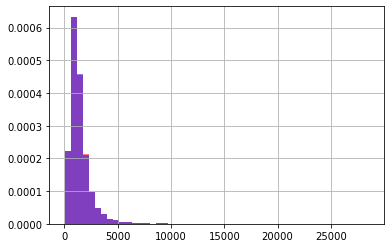

In [15]:
data['population'].hist(bins=50,density=True, color='red', alpha=0.5)
data_noNAN['population'].hist(bins=50,density=True, color='blue', alpha=0.5)
plt.show()

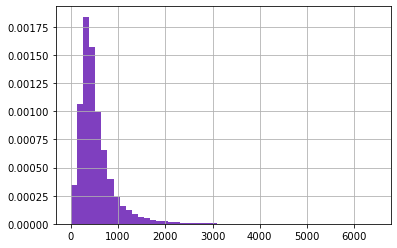

In [16]:
data['total_bedrooms'].hist(bins=50,density=True, color='red', alpha=0.5)
data_noNAN['total_bedrooms'].hist(bins=50,density=True, color='blue', alpha=0.5)
plt.show()



# Inciso 3 Si la variable es numérica realice un análisis de cual sería el mejor método para realizar la imputación de datos, debe mostrar un bloque de código donde se muestre cada imputación y su análisis. Recuerde que puede ser:

In [17]:
# Imputar valores faltantes en variables numéricas con la media

import pandas as pd

data = pd.read_csv('train.csv')

for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        if data[col].isna().sum() > 0 and data[col].isna().sum() < len(data)*0.05:
            data[col].fillna(data[col].mean(), inplace=True)

In [18]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv('train.csv')

# Identificar las variables numéricas con valores faltantes
num_vars_with_missing = [var for var in data.columns if data[var].isnull().sum() > 0 and data[var].dtype != 'O']

# Imputar los valores faltantes con la media en todo el dataset
for var in num_vars_with_missing:
    mean_val = data[var].mean()
    data[var] = data[var].fillna(mean_val)

# Inciso 4 Imputación Variables Categoricas

In [19]:
import pandas as pd


for col in data.columns:
    if data[col].dtype == 'object':
        if data[col].isna().sum() > 0 and data[col].isna().sum() < len(data)*0.05:
            data[col].fillna(data[col].mode()[0], inplace=True)

In [20]:
import pandas as pd


# Identificar las variables categóricas con valores faltantes
cat_vars_with_missing = [var for var in data.columns if data[var].isnull().sum() > 0 and data[var].dtype == 'O']

# Imputar los valores faltantes con la moda en todo el dataset
for var in cat_vars_with_missing:
    mode_val = data[var].mode()[0]
    data[var] = data[var].fillna(mode_val)

# Inciso 5 Códificación de Variables Categoricas utilizando One Hote Encoding

In [21]:
import pandas as pd


# Seleccionar las columnas categóricas a codificar
columnas_categoricas = ['ocean_proximity']

# Aplicar One Hot Encoding
data_encoded = pd.get_dummies(data, columns=columnas_categoricas)

# Ver los resultados
print(data_encoded.head())


      id  longitude  latitude  housing_median_age  total_rooms  \
0   9744    -121.65     36.77                  15         2191   
1  13893    -116.27     34.13                  37          452   
2  18277    -122.07     37.34                  35         1172   
3  16176    -122.39     37.74                  52          126   
4   8843    -118.38     34.09                  28         4001   

   total_bedrooms  population  households  median_income  median_house_value  \
0           358.0        1150         330         4.7969            227500.0   
1           109.0         184          59         3.7292             65800.0   
2           184.0         512         175         7.3561            500001.0   
3            24.0          37          27        10.2264            225000.0   
4          1352.0        1799        1220         2.5784            272900.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          1              

# Inciso 6 Para todas las variables resultantes realice Feature Scaling según lo considere más pertinente

In [23]:
print(data_encoded.head())


      id  longitude  latitude  housing_median_age  total_rooms  \
0   9744    -121.65     36.77                  15         2191   
1  13893    -116.27     34.13                  37          452   
2  18277    -122.07     37.34                  35         1172   
3  16176    -122.39     37.74                  52          126   
4   8843    -118.38     34.09                  28         4001   

   total_bedrooms  population  households  median_income  median_house_value  \
0           358.0        1150         330         4.7969            227500.0   
1           109.0         184          59         3.7292             65800.0   
2           184.0         512         175         7.3561            500001.0   
3            24.0          37          27        10.2264            225000.0   
4          1352.0        1799        1220         2.5784            272900.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          1              

In [24]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Obtener las columnas a escalar
columnas_a_escalar = ['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

# Aplicar Feature Scaling a las columnas seleccionadas
data_encoded[columnas_a_escalar] = scaler.fit_transform(data_encoded[columnas_a_escalar])

# Ver los resultados
print(data_encoded.head())


      id  longitude  latitude  housing_median_age  total_rooms  \
0   9744    -121.65     36.77                  15         2191   
1  13893    -116.27     34.13                  37          452   
2  18277    -122.07     37.34                  35         1172   
3  16176    -122.39     37.74                  52          126   
4   8843    -118.38     34.09                  28         4001   

   total_bedrooms  population  households  median_income  median_house_value  \
0           358.0        1150         330         4.7969            227500.0   
1           109.0         184          59         3.7292             65800.0   
2           184.0         512         175         7.3561            500001.0   
3            24.0          37          27        10.2264            225000.0   
4          1352.0        1799        1220         2.5784            272900.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                   1.123833              

# Inciso 7 Crear un modelo de regresión

In [25]:
# Creación de modelo 
from sklearn.linear_model import LinearRegression


In [26]:
# Crear instancia al modelo
model = LinearRegression()


In [30]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('population', axis=1), 
                                                    data_encoded['population'], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [31]:
# Ajustar el modelo utilizando los datos de entrenamiento

model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 405.4570965822762
